In [24]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo CSV
files_path = '/dataset2.csv'
data = pd.read_csv(files_path)

In [25]:
# Obtener información general del archivo
data_info = data.info()
data_head = data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [26]:
#Verificar valores nulos
data.isnull().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [27]:
#Verificar valores duplicados
data.duplicated().sum()

0

In [28]:
#Analizar variables descriptivas
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


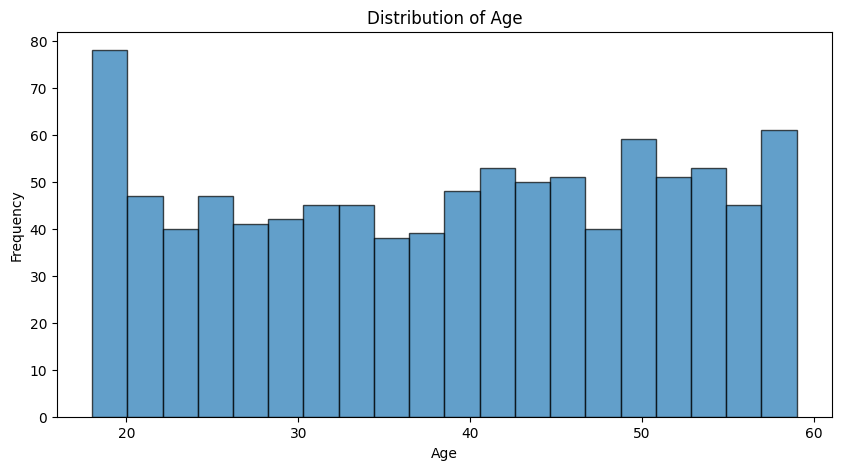

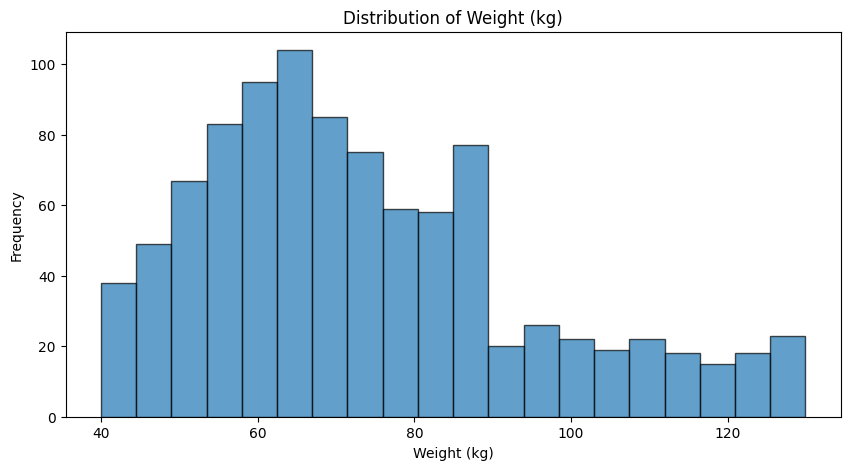

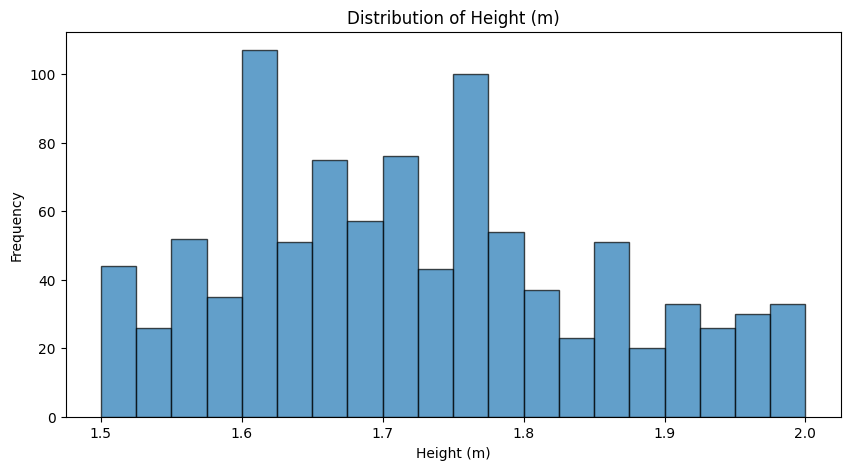

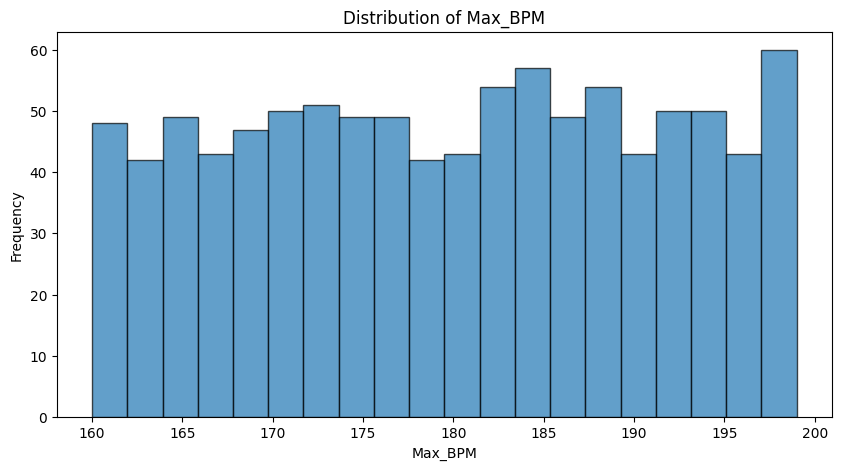

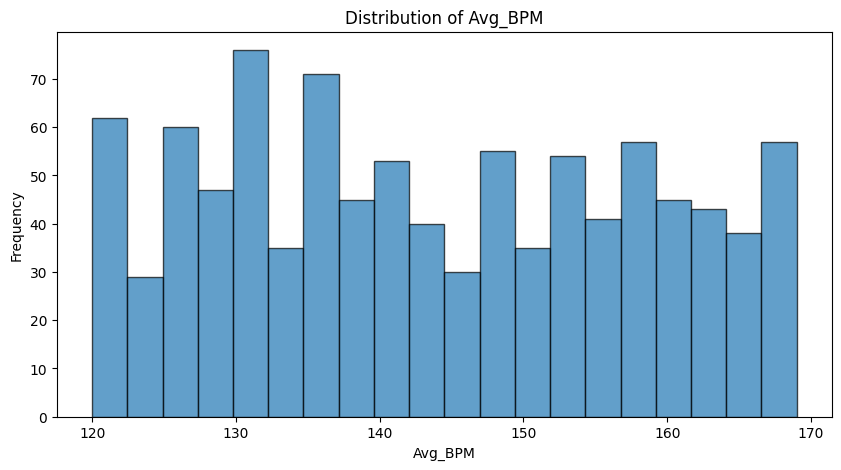

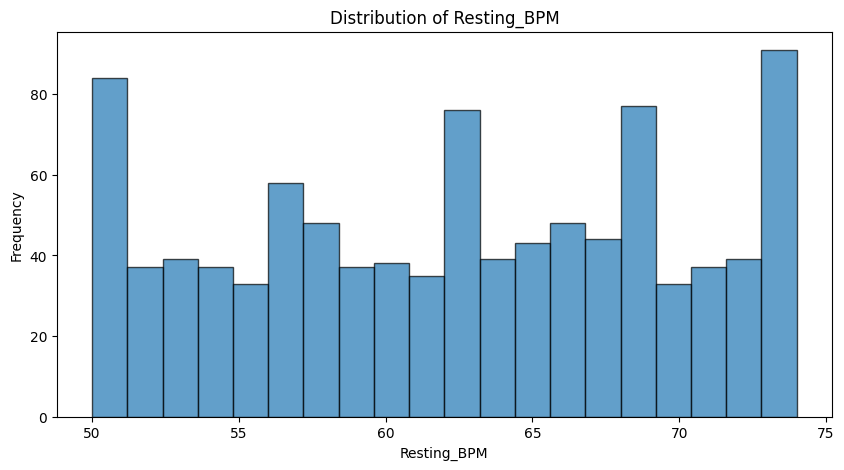

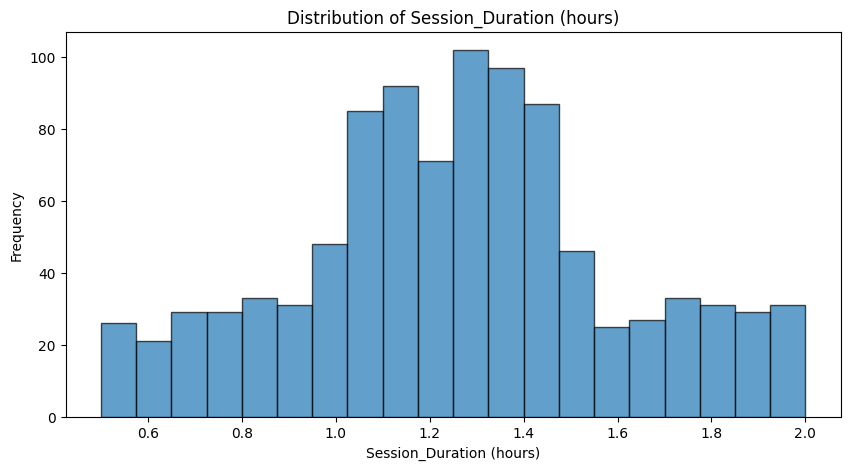

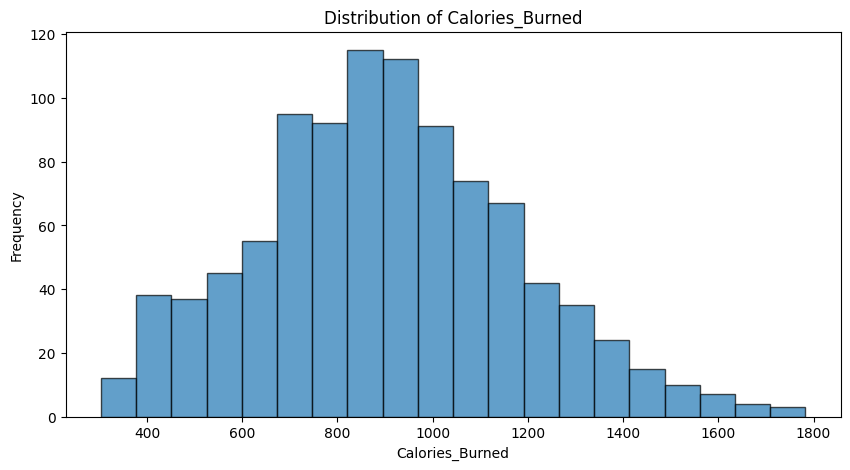

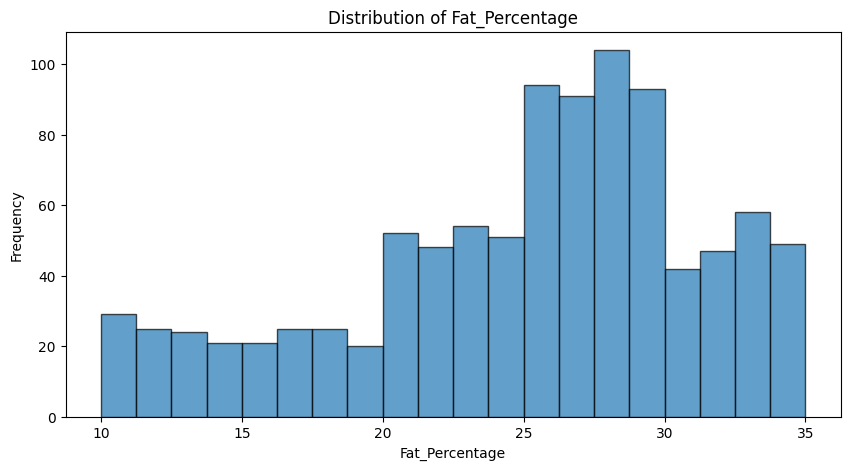

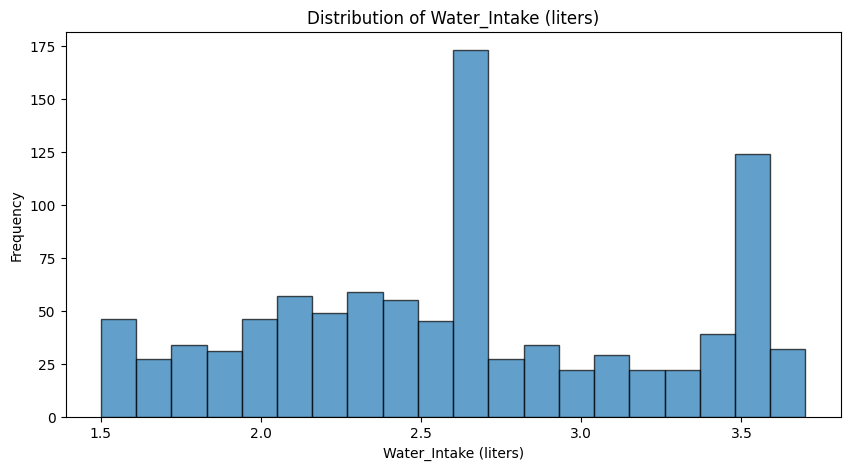

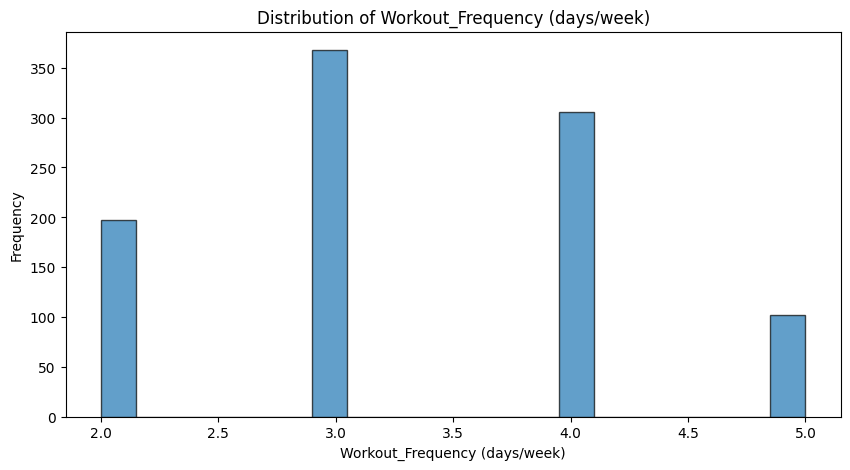

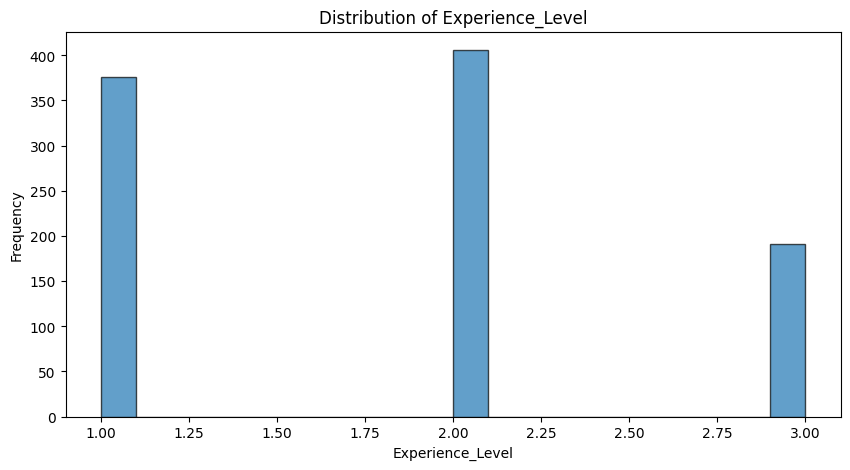

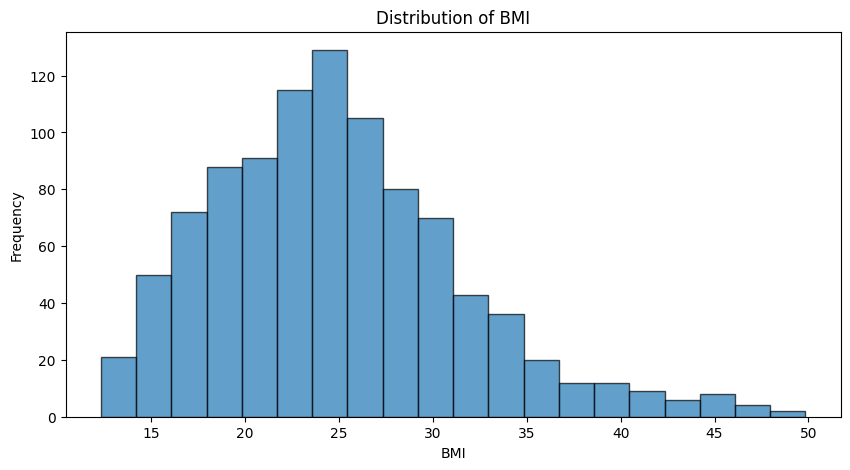

In [29]:
# Gráficos de histogramas para variables numéricas
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    plt.hist(data[column], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

**Edad:** La mayoría de los usuarios se concentra entre los 30 y 50 años, con un pico en los 40. Esto indica que el gimnasio tiene una base de clientes predominantemente de mediana edad.

**Peso (kg):** Distribución relativamente normal, pero con una ligera concentración en el rango de 50-80 kg. Algunos pesos extremos (por encima de 110 kg) son poco comunes.

**Altura (m):** La mayoría de los usuarios tienen alturas entre 1.6 m y 1.8 m, con pocas personas fuera de este rango.

**Calorías Quemadas:** Distribución asimétrica, con la mayoría de las sesiones quemando entre 700 y 1000 calorías, pero con algunos valores elevados (más de 1500 calorías) que representan outliers.

**BMI:** Tiene una distribución más dispersa, con valores concentrados en rangos saludables (20-30), pero también algunos casos extremos de obesidad y bajo peso.

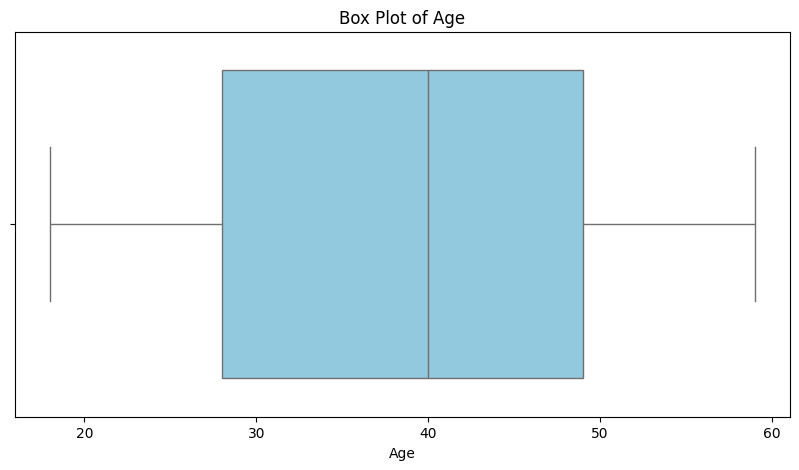

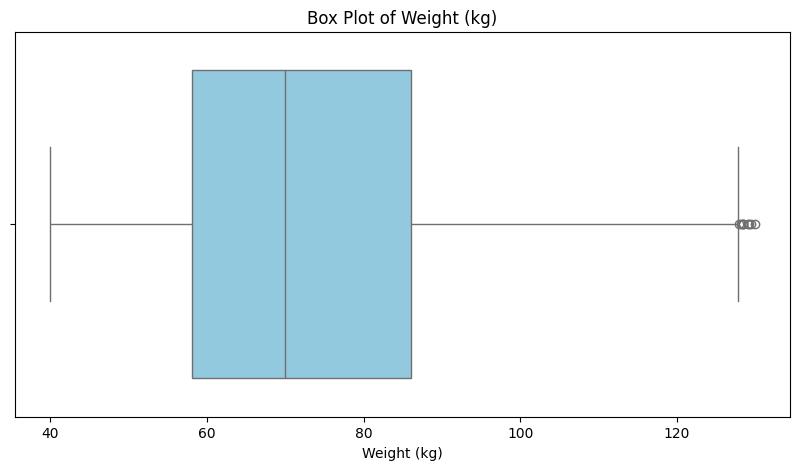

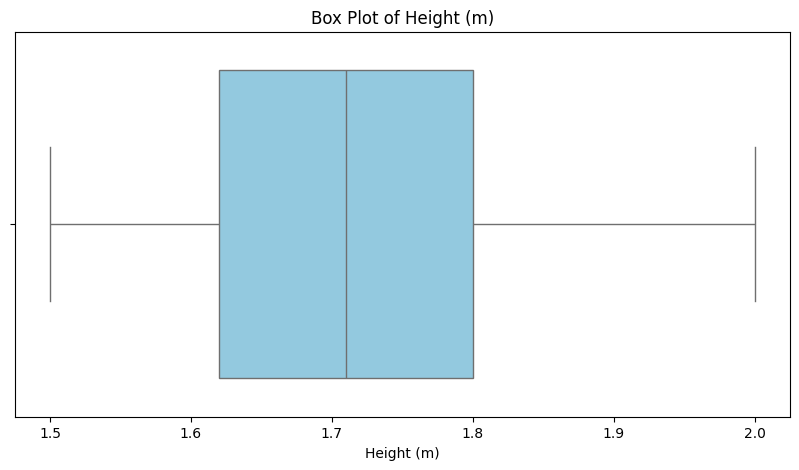

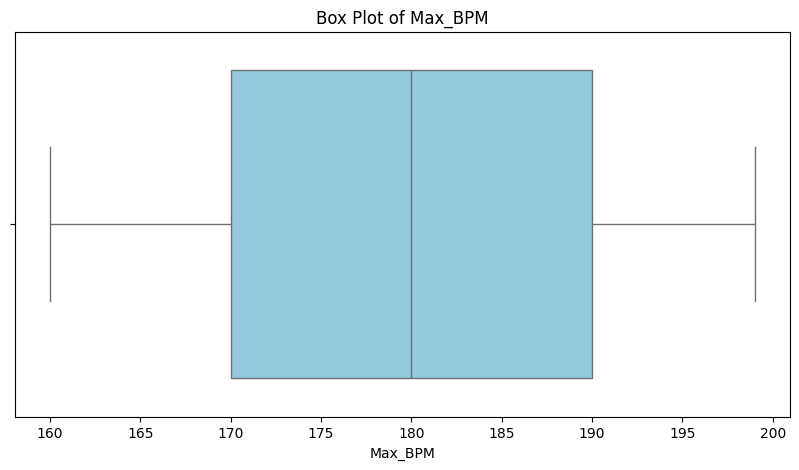

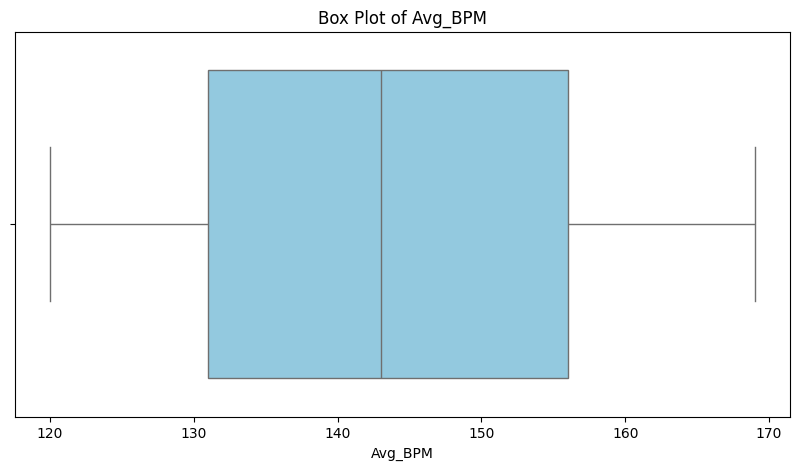

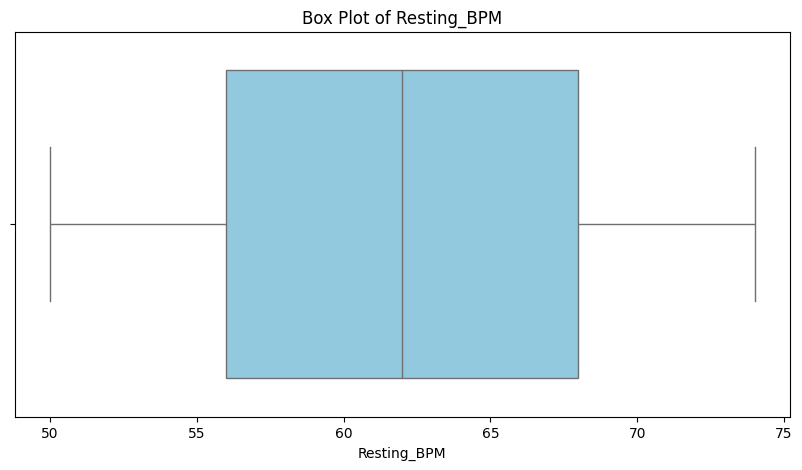

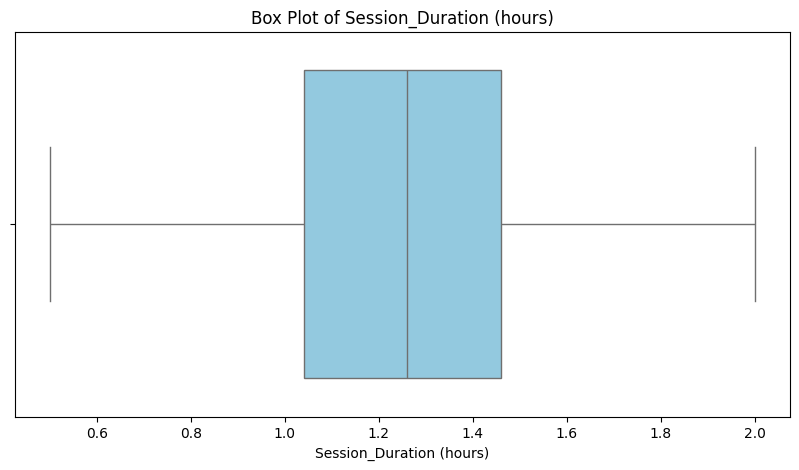

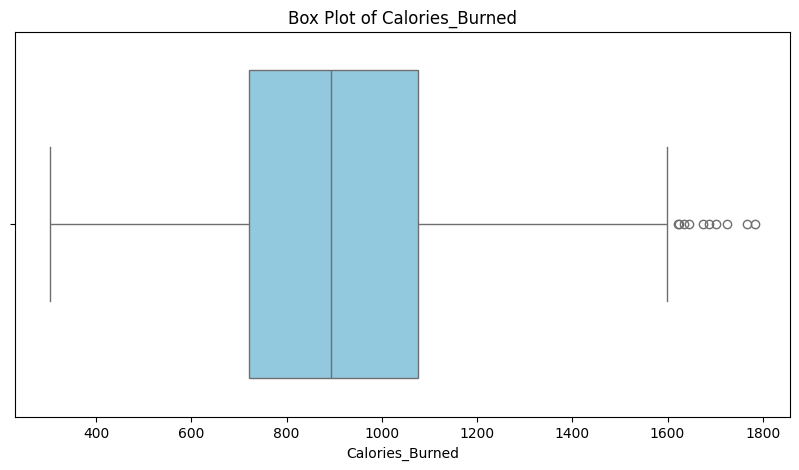

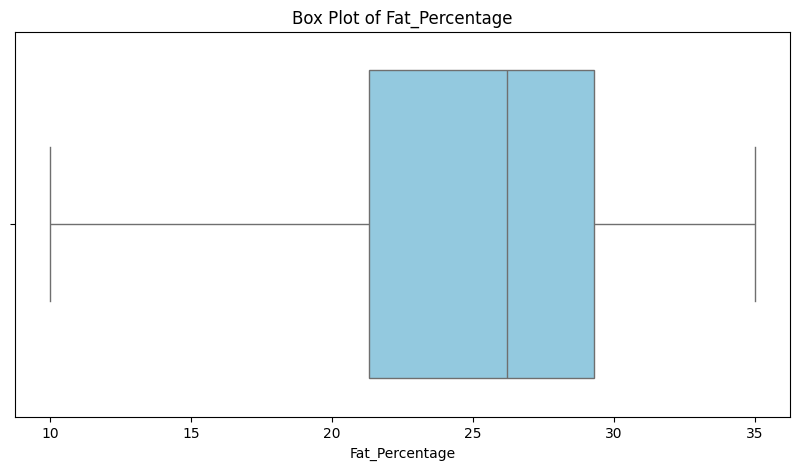

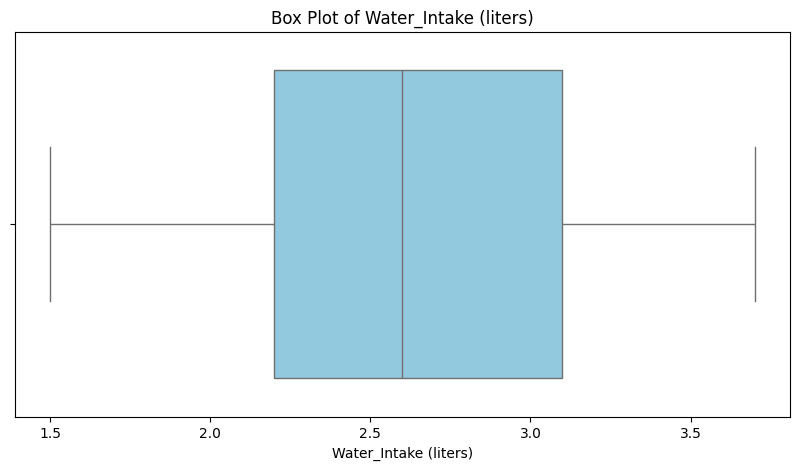

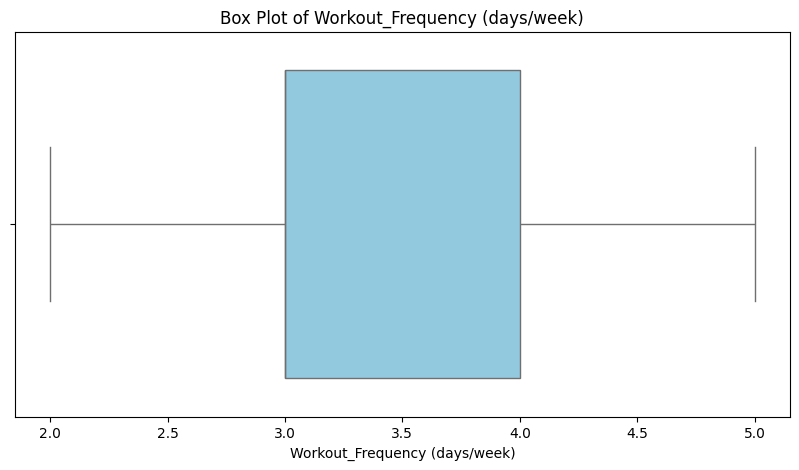

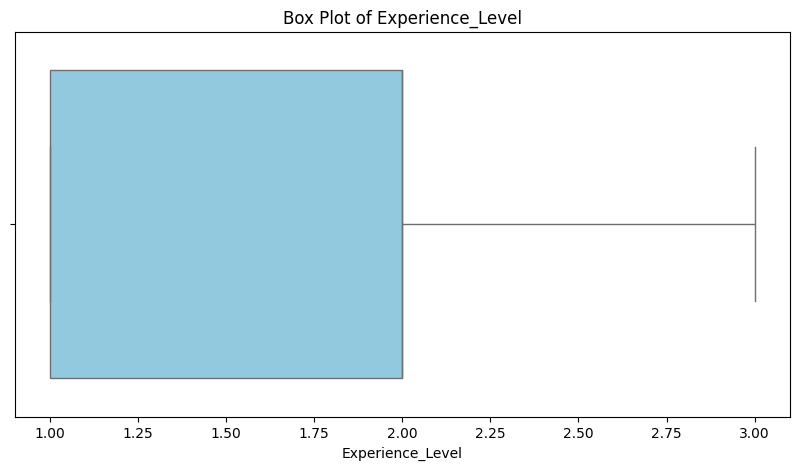

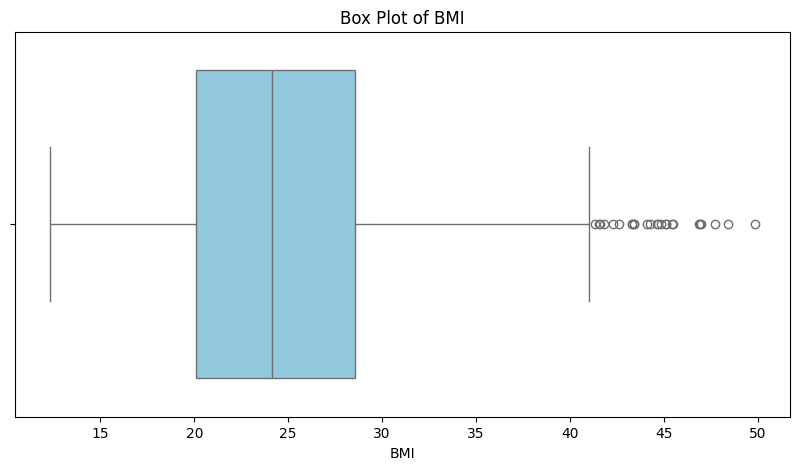

In [30]:
# Gráficos de box plots para detección de outliers
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


**Peso:** Hay valores extremos por encima de 110 kg y por debajo de 50 kg. Esto podría deberse a una población diversa en términos de objetivos físicos.

**Calorías Quemadas:** Presenta varios outliers por encima de 1500 calorías, lo que podría indicar sesiones excepcionales o errores en la captura de datos.

**Duración de la Sesión:** Aunque la mayoría de las sesiones duran entre 1 y 1.5 horas, hay valores extremos cercanos a 2 horas, lo cual es menos frecuente.

**BMI:** Se identifican valores bajos extremos (<15) y valores altos (>40), lo que destaca la necesidad de revisar o considerar estas observaciones en el análisis.

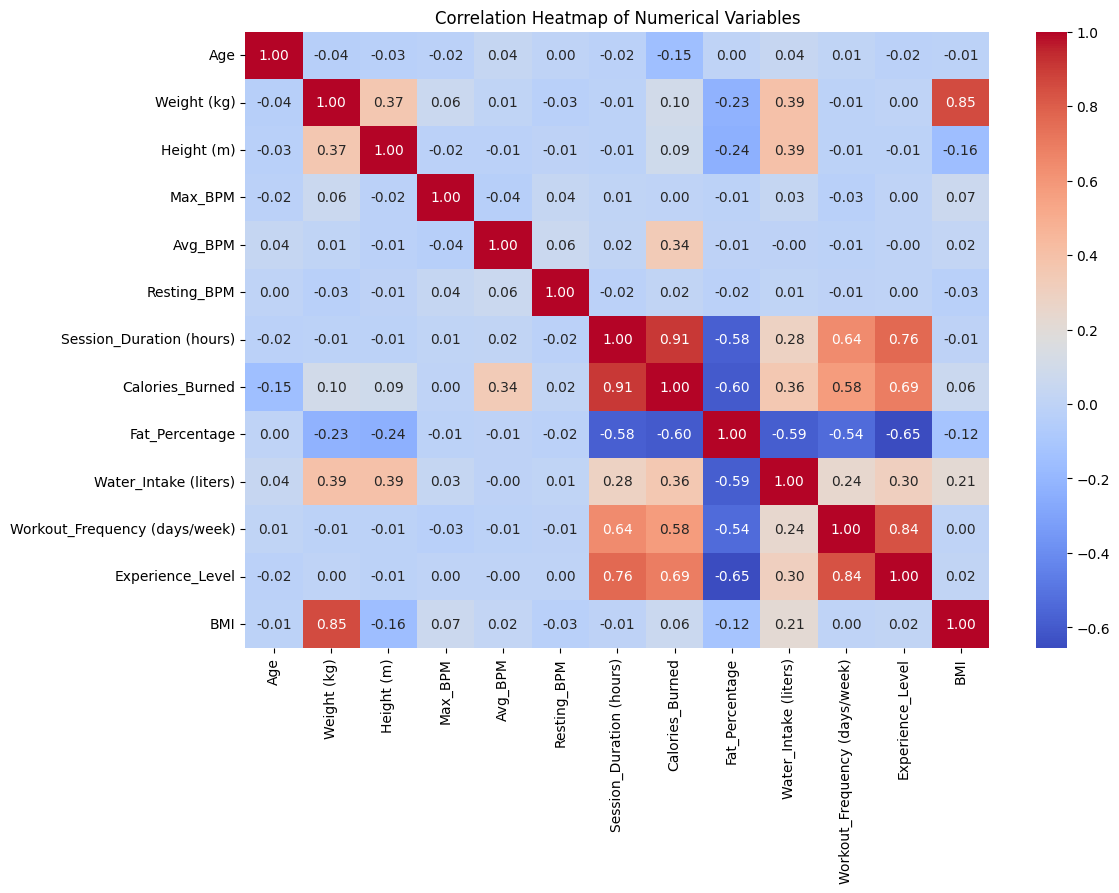

In [31]:
# Mapa de calor de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


**Peso y BMI:** Alta correlación positiva (~0.95). Esto es esperado, ya que el BMI depende directamente del peso y la altura.

**Duración de la Sesión y Calorías Quemadas:** Moderada correlación (~0.68). Esto indica que la duración del ejercicio tiene un impacto considerable en la cantidad de calorías quemadas.

**Edad y Max BPM:** Baja correlación negativa (~-0.25). Los usuarios más jóvenes tienden a tener BPM máximos más altos, lo que es consistente con la fisiología.

**Frecuencia de Ejercicio y Experiencia:** Baja correlación (~0.22), sugiriendo que la experiencia no siempre se traduce en mayor frecuencia semanal.

#Resumen de Hallazgos

1. Variable objetivo potencial: Calories_Burned (Calorías quemadas por sesión).
2. Distribución: Amplia dispersión con un promedio de 905 calorías y valores extremos superiores a 1500.

**Tipos de datos:**

1. Variables categóricas clave: Gender, Workout_Type.
2. Variables numéricas clave: Age, Weight (kg), Session_Duration (hours), BMI, Workout_Frequency (days/week).

**Correlaciones:**

1. Relación moderada entre Session_Duration y Calories_Burned (~0.68).
2. Alta correlación entre Weight y BMI (~0.95), indicando que ambas están altamente relacionadas.
3. Baja correlación negativa entre Age y Max_BPM (~-0.25), consistente con diferencias fisiológicas por edad.

**Desafíos del Dataset:**

1. Valores extremos: Presentes en variables como Weight, Calories_Burned y BMI, que pueden afectar el rendimiento de los modelos predictivos.
2. Distribuciones sesgadas: Variables como Calories_Burned y BMI muestran asimetrías que pueden requerir transformaciones para normalizar los datos.
3. Heterogeneidad de patrones: Variabilidad significativa en la frecuencia de ejercicio y tipo de entrenamiento, lo que puede complicar la identificación de relaciones claras.

**Problemática Seleccionada:**
1. Regresión: Predicción de calorías quemadas por sesión.

**Justificación:**
1. Relevancia: Ayuda a personalizar las recomendaciones de entrenamiento según el perfil de los usuarios, mejorando su experiencia y resultados.
2. Impacto práctico: Permite al gimnasio ofrecer servicios adaptados que fomenten la retención de clientes.
3. Desafío técnico: Los valores extremos y las correlaciones moderadas entre las variables representan un reto para construir un modelo robusto.

**Análisis Adicional:**
1. Outliers: Necesario investigar y manejar valores extremos, especialmente en Calories_Burned y BMI.
2. Variables categóricas: Requieren codificación adecuada para su uso en modelos de regresión.
3. Exploración no lineal: Las relaciones moderadas sugieren que podría ser útil considerar interacciones o modelos más complejos como regresión polinómica o modelos de árbol.